In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv') 

In [3]:
# preview the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# check missing values in variables
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [7]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6700, 13), (3300, 13))

In [9]:
# check data types in X_train
X_train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [10]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,8372,15661034,Ngozichukwuka,813,Germany,Female,29,5,106059.40,1,0,0,187976.88
5027,5028,15807989,Wall,681,Germany,Male,37,8,73179.34,2,1,1,25292.53
9234,9235,15766044,Cameron,642,Germany,Male,49,4,120688.61,1,1,0,24770.22
3944,3945,15794792,Golubev,612,France,Female,31,8,117989.76,1,1,1,54129.86
6862,6863,15736287,Piccio,586,France,Male,33,9,0.00,1,1,0,6975.02


In [11]:
# import category encoders
import category_encoders as ce

In [12]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [13]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,1,1,1,1,1,1,1,1,1,1,1,1,1
5027,2,2,2,2,1,2,2,2,2,2,2,2,2
9234,3,3,3,3,1,2,3,3,3,1,2,1,3
3944,4,4,4,4,2,1,4,2,4,1,2,2,4
6862,5,5,5,5,2,2,5,4,5,1,2,1,5


In [14]:
X_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-1.0,-1.0,136.0,382.0,1,2,39.0,11,-1.0,2,1,1,-1.0
4684,-1.0,-1.0,-1.0,366.0,2,2,15.0,10,5.0,2,2,2,-1.0
1731,-1.0,-1.0,927.0,85.0,3,1,29.0,3,5.0,2,2,1,-1.0
4742,-1.0,-1.0,609.0,395.0,1,2,26.0,2,-1.0,2,2,2,-1.0
4521,-1.0,-1.0,567.0,238.0,3,1,9.0,6,-1.0,1,2,2,-1.0


In [15]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7027


In [16]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7027


In [17]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

NumOfProducts      0.133624
Age                0.125412
CreditScore        0.106832
Surname            0.106176
EstimatedSalary    0.092710
CustomerId         0.092282
RowNumber          0.091634
Balance            0.085446
Tenure             0.063019
Geography          0.039345
IsActiveMember     0.029914
HasCrCard          0.016826
Gender             0.016780
dtype: float64

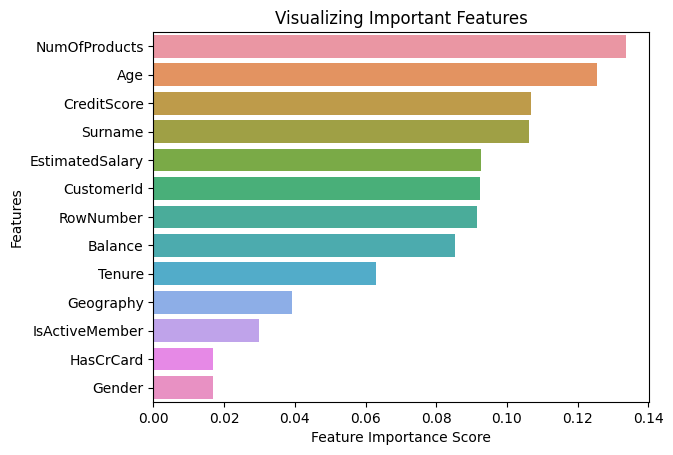

In [19]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [20]:
# declare feature vector and target variable
X = df.drop(['Exited', 'Gender'], axis=1)
y = df['Exited']

In [21]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [22]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [23]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with Gender variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Gender variable removed : 0.5597


In [24]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1402 1255]
 [ 198  445]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66      2657
           1       0.26      0.69      0.38       643

    accuracy                           0.56      3300
   macro avg       0.57      0.61      0.52      3300
weighted avg       0.76      0.56      0.60      3300

